In [1]:
## importing required libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("Train-1617360447408-1660719685476.csv")

# EDA

In [4]:
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [5]:
enc=df['encounter_id']
enc

0        197029140
1        163571946
2        256497366
3        289891212
4         81873900
           ...    
66582    124202466
66583    145667070
66584    231061116
66585     84911682
66586    153167502
Name: encounter_id, Length: 66587, dtype: int64

In [6]:
df.shape

(66587, 49)

In [7]:
df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [9]:
df.describe()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000
mean,50903.474282,1.653153e+08,5.422970e+07,4.397510,43.115533,1.331521,16.028744,0.365672,0.200460,0.637602,49.703387,7.424948,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,2.980995,19.630417,1.705746,8.125304,1.221861,0.905503,1.255487,28.864879,1.933061,0.498559
min,0.000000,1.573800e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,1.000000,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.622056,6.000000,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.508499,8.000000,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.637294,9.000000,1.000000
max,101765.000000,4.438672e+08,1.893494e+08,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,1.000000


In [10]:
df.duplicated().sum()


17676

In [11]:
df['encounter_id'].duplicated().sum()

17676

In [12]:
df.drop_duplicates(subset="encounter_id",
                     keep=False, inplace=True)

In [13]:
df['encounter_id'].duplicated().sum()

0

In [14]:
df['patient_id'].duplicated().sum()

5111

In [15]:
df['index'].duplicated().sum()

0

In [16]:
df.nunique()

index                 34654
encounter_id          34654
patient_id            29543
race                      6
gender                    3
age                      10
weight                    9
time_in_hospital         14
medical_specialty        63
num_lab_procedures      112
num_procedures            7
num_medications          70
number_outpatient        28
number_emergency         24
number_inpatient         18
diag_1                  616
diag_2                  605
diag_3                  657
diag_4                  657
diag_5                34654
number_diagnoses         16
X1                        4
X2                        4
X3                        4
X4                        4
X5                        4
X6                        3
X7                        4
X8                        1
X9                        4
X10                       4
X11                       2
X12                       4
X13                       4
X14                       3
X15                 

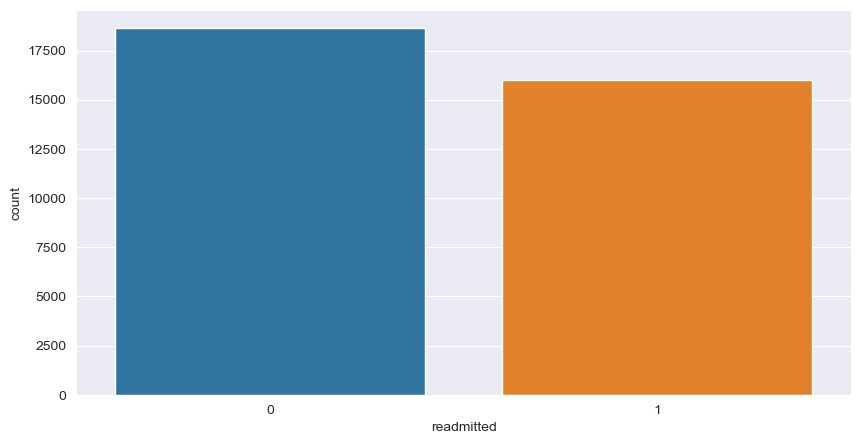

In [17]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x=df["readmitted"]);

<AxesSubplot:>

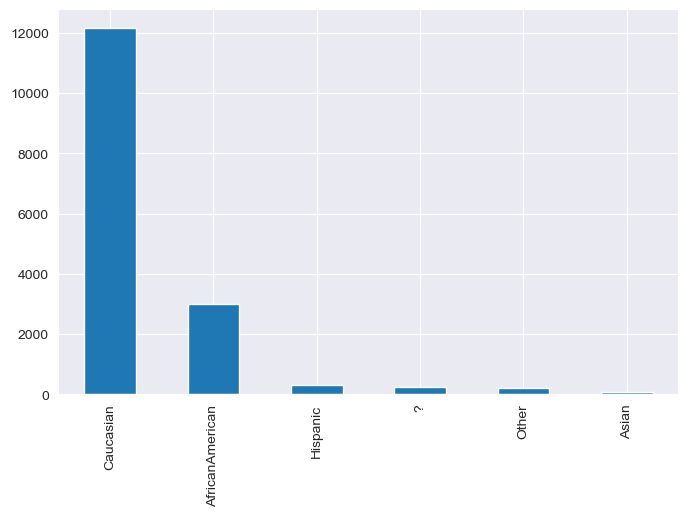

In [18]:
plt.rcParams['figure.figsize']= [8.0, 5.0]
df.loc[df['readmitted'].isin(['1','Yes',1]),'race'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Age')

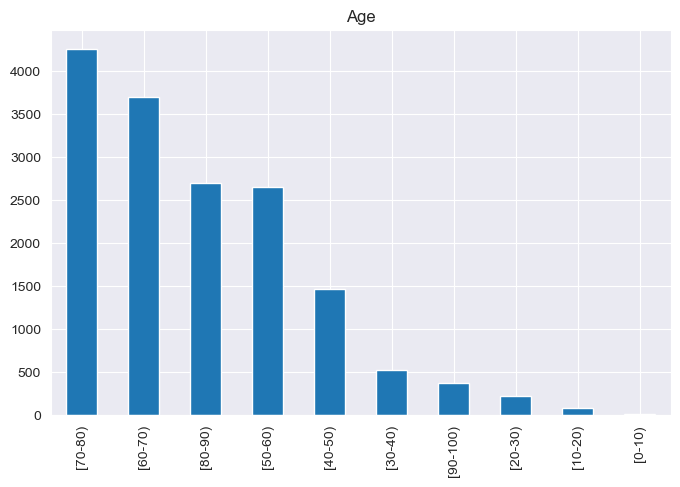

In [19]:
df.loc[df['readmitted'].isin(['1','Yes',1]),'age'].value_counts().plot(kind='bar')
plt.title("Age")

<AxesSubplot:>

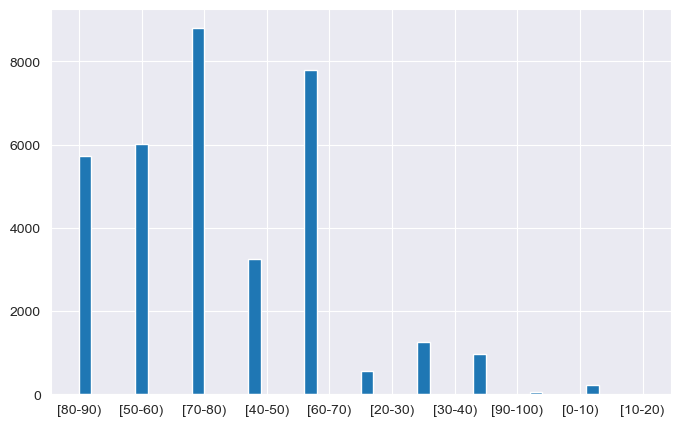

In [20]:
df.age.hist(width=.2)

In [21]:
df.medical_specialty.value_counts()

?                                 16993
InternalMedicine                   4952
Family/GeneralPractice             2608
Emergency/Trauma                   2553
Cardiology                         1834
                                  ...  
OutreachServices                      1
Proctology                            1
Psychiatry-Addictive                  1
DCPTEAM                               1
Pediatrics-Hematology-Oncology        1
Name: medical_specialty, Length: 63, dtype: int64

#  na values


In [22]:
df.isna().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [23]:
df['diag_1'] =  pd.to_numeric(df['diag_1'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_2'] =  pd.to_numeric(df['diag_2'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_3'] =  pd.to_numeric(df['diag_3'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))
df['diag_4'] =  pd.to_numeric(df['diag_4'].apply(lambda x: np.nan if x[0].isnumeric() == False else x))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34654 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               34654 non-null  int64  
 1   encounter_id        34654 non-null  int64  
 2   patient_id          34654 non-null  int64  
 3   race                34654 non-null  object 
 4   gender              34654 non-null  object 
 5   age                 34654 non-null  object 
 6   weight              34654 non-null  object 
 7   time_in_hospital    34654 non-null  int64  
 8   medical_specialty   34654 non-null  object 
 9   num_lab_procedures  34654 non-null  int64  
 10  num_procedures      34654 non-null  int64  
 11  num_medications     34654 non-null  int64  
 12  number_outpatient   34654 non-null  int64  
 13  number_emergency    34654 non-null  int64  
 14  number_inpatient    34654 non-null  int64  
 15  diag_1              34058 non-null  float64
 16  diag

In [25]:
df = df.replace('?', np.nan)

In [26]:
df.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                    804
gender                    0
age                       0
weight                33563
time_in_hospital          0
medical_specialty     16993
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                  596
diag_2                  927
diag_3                 2202
diag_4                 2202
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34654 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               34654 non-null  int64  
 1   encounter_id        34654 non-null  int64  
 2   patient_id          34654 non-null  int64  
 3   race                33850 non-null  object 
 4   gender              34654 non-null  object 
 5   age                 34654 non-null  object 
 6   weight              1091 non-null   object 
 7   time_in_hospital    34654 non-null  int64  
 8   medical_specialty   17661 non-null  object 
 9   num_lab_procedures  34654 non-null  int64  
 10  num_procedures      34654 non-null  int64  
 11  num_medications     34654 non-null  int64  
 12  number_outpatient   34654 non-null  int64  
 13  number_emergency    34654 non-null  int64  
 14  number_inpatient    34654 non-null  int64  
 15  diag_1              34058 non-null  float64
 16  diag

#  Data Preprocessing


In [28]:
df_pp = df.copy()
df_pp

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
7,91744,313193054,171347630,Caucasian,Female,[40-50),NaN,4,NaN,15,...,No,No,No,No,No,No,No,No,No,0
8,27014,88645302,20811105,Caucasian,Female,[70-80),NaN,13,Family/GeneralPractice,70,...,No,No,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),NaN,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),NaN,4,NaN,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),NaN,2,NaN,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,NaN,Female,[80-90),NaN,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


In [29]:
df_pp=df_pp.drop(['weight','race','medical_specialty','index','encounter_id','patient_id','X8','X18','X19','X25'], axis=1)

In [30]:
df_pp.head(5)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X16,X17,X20,X21,X22,X23,X24,change,diabetesMed,readmitted
0,Male,[80-90),4,39,1,9,1,1,4,783.0,...,No,No,No,No,No,No,No,No,Yes,1
2,Female,[50-60),6,50,2,24,0,0,5,574.0,...,No,No,Down,No,No,No,No,Ch,Yes,1
4,Male,[70-80),9,17,1,11,0,0,0,311.0,...,No,No,No,No,No,No,No,No,No,1
7,Female,[40-50),4,15,3,17,0,0,0,552.0,...,No,No,No,No,No,No,No,No,No,0
8,Female,[70-80),13,70,5,32,0,0,0,427.0,...,No,No,No,No,No,No,No,No,Yes,0


In [31]:

display(df_pp)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X16,X17,X20,X21,X22,X23,X24,change,diabetesMed,readmitted
0,Male,[80-90),4,39,1,9,1,1,4,783.0,...,No,No,No,No,No,No,No,No,Yes,1
2,Female,[50-60),6,50,2,24,0,0,5,574.0,...,No,No,Down,No,No,No,No,Ch,Yes,1
4,Male,[70-80),9,17,1,11,0,0,0,311.0,...,No,No,No,No,No,No,No,No,No,1
7,Female,[40-50),4,15,3,17,0,0,0,552.0,...,No,No,No,No,No,No,No,No,No,0
8,Female,[70-80),13,70,5,32,0,0,0,427.0,...,No,No,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,Female,[70-80),11,40,4,35,0,0,0,562.0,...,No,No,Steady,No,No,No,No,No,Yes,0
66583,Male,[80-90),4,39,1,7,0,0,0,188.0,...,No,No,No,No,No,No,No,No,No,1
66584,Female,[60-70),2,24,1,13,0,0,2,996.0,...,No,No,No,No,No,No,No,No,Yes,1
66585,Female,[80-90),4,39,1,14,0,0,0,427.0,...,No,No,No,No,No,No,No,No,No,0


In [32]:
df_pp.isnull().mean() * 100

gender                0.000000
age                   0.000000
time_in_hospital      0.000000
num_lab_procedures    0.000000
num_procedures        0.000000
num_medications       0.000000
number_outpatient     0.000000
number_emergency      0.000000
number_inpatient      0.000000
diag_1                1.719859
diag_2                2.675016
diag_3                6.354245
diag_4                6.354245
diag_5                0.000000
number_diagnoses      0.000000
X1                    0.000000
X2                    0.000000
X3                    0.000000
X4                    0.000000
X5                    0.000000
X6                    0.000000
X7                    0.000000
X9                    0.000000
X10                   0.000000
X11                   0.000000
X12                   0.000000
X13                   0.000000
X14                   0.000000
X15                   0.000000
X16                   0.000000
X17                   0.000000
X20                   0.000000
X21     

In [33]:
df_pp.isna().sum()

gender                   0
age                      0
time_in_hospital         0
num_lab_procedures       0
num_procedures           0
num_medications          0
number_outpatient        0
number_emergency         0
number_inpatient         0
diag_1                 596
diag_2                 927
diag_3                2202
diag_4                2202
diag_5                   0
number_diagnoses         0
X1                       0
X2                       0
X3                       0
X4                       0
X5                       0
X6                       0
X7                       0
X9                       0
X10                      0
X11                      0
X12                      0
X13                      0
X14                      0
X15                      0
X16                      0
X17                      0
X20                      0
X21                      0
X22                      0
X23                      0
X24                      0
change                   0
d

In [34]:
df_pp.dropna(axis=0, inplace=True)

In [35]:
df_pp.isna().sum()

gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X20                   0
X21                   0
X22                   0
X23                   0
X24                   0
change                0
diabetesMed           0
readmitted            0
dtype: int64

In [36]:
df_pp.shape

(31315, 39)

In [37]:
df_clean=df_pp


In [38]:
df_clean = pd.get_dummies(df_clean, columns=['change','diabetesMed','age'])

In [39]:
df_clean

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,Male,4,39,1,9,1,1,4,783.0,403.00,...,0,0,0,0,0,0,0,0,1,0
2,Female,6,50,2,24,0,0,5,574.0,403.00,...,0,0,0,0,0,1,0,0,0,0
4,Male,9,17,1,11,0,0,0,311.0,276.00,...,0,0,0,0,0,0,0,1,0,0
7,Female,4,15,3,17,0,0,0,552.0,250.00,...,0,0,0,0,1,0,0,0,0,0
8,Female,13,70,5,32,0,0,0,427.0,427.00,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,Female,11,40,4,35,0,0,0,562.0,276.00,...,0,0,0,0,0,0,0,1,0,0
66583,Male,4,39,1,7,0,0,0,188.0,599.00,...,0,0,0,0,0,0,0,0,1,0
66584,Female,2,24,1,13,0,0,2,996.0,414.00,...,0,0,0,0,0,0,1,0,0,0
66585,Female,4,39,1,14,0,0,0,427.0,496.00,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df_clean.columns

Index(['gender', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5',
       'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X20', 'X21',
       'X22', 'X23', 'X24', 'readmitted', 'change_Ch', 'change_No',
       'diabetesMed_No', 'diabetesMed_Yes', 'age_[0-10)', 'age_[10-20)',
       'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)',
       'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)'],
      dtype='object')

In [41]:
df_clean = pd.get_dummies(df_clean, columns=[ 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X20', 'X21',
       'X22', 'X23', 'X24','gender'])

In [42]:
df_clean

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,X21_Steady,X21_Up,X22_No,X22_Steady,X23_No,X23_Steady,X24_No,gender_Female,gender_Male,gender_Unknown/Invalid
0,4,39,1,9,1,1,4,783.0,403.00,585.0,...,0,0,1,0,1,0,1,0,1,0
2,6,50,2,24,0,0,5,574.0,403.00,585.0,...,0,0,1,0,1,0,1,1,0,0
4,9,17,1,11,0,0,0,311.0,276.00,300.0,...,0,0,1,0,1,0,1,0,1,0
7,4,15,3,17,0,0,0,552.0,250.00,780.0,...,0,0,1,0,1,0,1,1,0,0
8,13,70,5,32,0,0,0,427.0,427.00,458.0,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,11,40,4,35,0,0,0,562.0,276.00,458.0,...,0,0,1,0,1,0,1,1,0,0
66583,4,39,1,7,0,0,0,188.0,599.00,591.0,...,0,0,1,0,1,0,1,0,1,0
66584,2,24,1,13,0,0,2,996.0,414.00,250.0,...,0,0,1,0,1,0,1,1,0,0
66585,4,39,1,14,0,0,0,427.0,496.00,518.0,...,0,0,1,0,1,0,1,1,0,0


In [43]:
df_clean.shape

(31315, 98)

In [44]:
df_pp.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,...,X16,X17,X20,X21,X22,X23,X24,change,diabetesMed,readmitted
0,Male,[80-90),4,39,1,9,1,1,4,783.0,...,No,No,No,No,No,No,No,No,Yes,1
2,Female,[50-60),6,50,2,24,0,0,5,574.0,...,No,No,Down,No,No,No,No,Ch,Yes,1
4,Male,[70-80),9,17,1,11,0,0,0,311.0,...,No,No,No,No,No,No,No,No,No,1
7,Female,[40-50),4,15,3,17,0,0,0,552.0,...,No,No,No,No,No,No,No,No,No,0
8,Female,[70-80),13,70,5,32,0,0,0,427.0,...,No,No,No,No,No,No,No,No,Yes,0


In [45]:
#cat_columns = df_pp.select_dtypes(include=['object']).columns
#num_columns = df_pp.select_dtypes(include=['float64', 'int64']).columns
#target_col = 'readmitted'

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#for i in ['diag_1', 'diag_2', 'diag_3', 'diag_4']:
 #   df_pp[i] = le.fit_transform(df_pp[i])
#df_pp.head()

#for i in cat_columns:
 #   print('Unique Values in ' + i + ' Column:', end = " ")
  #  print(len(df_preprocessed[i].unique()))

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31315 entries, 0 to 66586
Data columns (total 98 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time_in_hospital        31315 non-null  int64  
 1   num_lab_procedures      31315 non-null  int64  
 2   num_procedures          31315 non-null  int64  
 3   num_medications         31315 non-null  int64  
 4   number_outpatient       31315 non-null  int64  
 5   number_emergency        31315 non-null  int64  
 6   number_inpatient        31315 non-null  int64  
 7   diag_1                  31315 non-null  float64
 8   diag_2                  31315 non-null  float64
 9   diag_3                  31315 non-null  float64
 10  diag_4                  31315 non-null  float64
 11  diag_5                  31315 non-null  float64
 12  number_diagnoses        31315 non-null  int64  
 13  readmitted              31315 non-null  int64  
 14  change_Ch               31315 non-null

In [47]:
#df_clean['diag_1'] = df_clean['diag_1'].astype(float)

In [48]:
from sklearn.model_selection import train_test_split

x= df_clean.drop(columns=["readmitted"])
y= df_clean["readmitted"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


In [49]:
x_train.head(5)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,...,X21_Steady,X21_Up,X22_No,X22_Steady,X23_No,X23_Steady,X24_No,gender_Female,gender_Male,gender_Unknown/Invalid
60825,3,52,0,12,0,0,4,507.0,808.0,276.0,...,0,0,1,0,1,0,1,0,1,0
4353,2,18,0,9,0,0,0,435.0,496.0,786.0,...,0,0,1,0,1,0,1,1,0,0
59009,7,55,0,7,0,0,3,482.0,518.0,560.0,...,0,0,1,0,1,0,1,0,1,0
10001,4,58,0,17,0,0,0,38.0,780.0,276.0,...,0,0,1,0,1,0,1,0,1,0
24094,4,36,0,18,2,0,0,491.0,428.0,244.0,...,0,0,1,0,1,0,1,1,0,0


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
x_train_scaled.shape

(28183, 97)

In [52]:
x_train_scaled

array([[0.15384615, 0.42857143, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.07692308, 0.14285714, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.46153846, 0.45378151, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.23076923, 0.50420168, 0.16666667, ..., 1.        , 0.        ,
        0.        ],
       [0.07692308, 0.34453782, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.52941176, 0.16666667, ..., 1.        , 0.        ,
        0.        ]])

# feature selection

In [53]:
#from sklearn.feature_selection import SelectKBest

#fs = SelectKBest(k=50)
#x_train_scaled = fs.fit_transform(x_train_scaled, y_train)
#x_test_scaled = fs.transform(x_test_scaled)

# model



In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
#lr = LogisticRegression()
#lr.fit(x_train_scaled, y_train)

#y_lr = lr.predict(x_test_scaled)

In [56]:
#dtree = DecisionTreeClassifier()
#dtree.fit(x_train_scaled, y_train)
#
#y_dtree = dtree.predict(x_test_scaled)

In [57]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train_scaled, y_train)

y_rf = rf.predict(x_test_scaled)

# evaluation

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#print("Decision Tree: ", classification_report(y_test, y_dtree))
#print("Decision Tree: ", accuracy_score(y_test, y_dtree))


In [59]:
print("Random Forest: ", classification_report(y_test, y_rf))
print("Random Forest: ", accuracy_score(y_test, y_rf))


Random Forest:                precision    recall  f1-score   support

           0       0.62      0.72      0.66      1679
           1       0.60      0.48      0.53      1453

    accuracy                           0.61      3132
   macro avg       0.61      0.60      0.60      3132
weighted avg       0.61      0.61      0.60      3132

Random Forest:  0.6085568326947637


In [60]:
#print("Logistic Regression: ", classification_report(y_test, y_lr))
#print("Logistic Regression: ", accuracy_score(y_test, y_lr))


In [61]:
x_test.shape

(3132, 97)

In [62]:
predictions = rf.predict(x_test)

C:\Users\keerthi\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [63]:
predictions

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [64]:
enc

0        197029140
1        163571946
2        256497366
3        289891212
4         81873900
           ...    
66582    124202466
66583    145667070
66584    231061116
66585     84911682
66586    153167502
Name: encounter_id, Length: 66587, dtype: int64

In [65]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('predictions.csv')